<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: #FF8C00;">Instructions:</h2>

- **Collaboration**: You are working in **pairs**, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None) 

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [2]:
# loading file 
df_price=pd.read_csv('asset_price_data.csv')
df=df_price.copy()

In [3]:
df.set_index('date',inplace=True)

In [4]:
df.shape
#df.head(3)

(783, 5)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'asset price series'}, xlabel='date'>

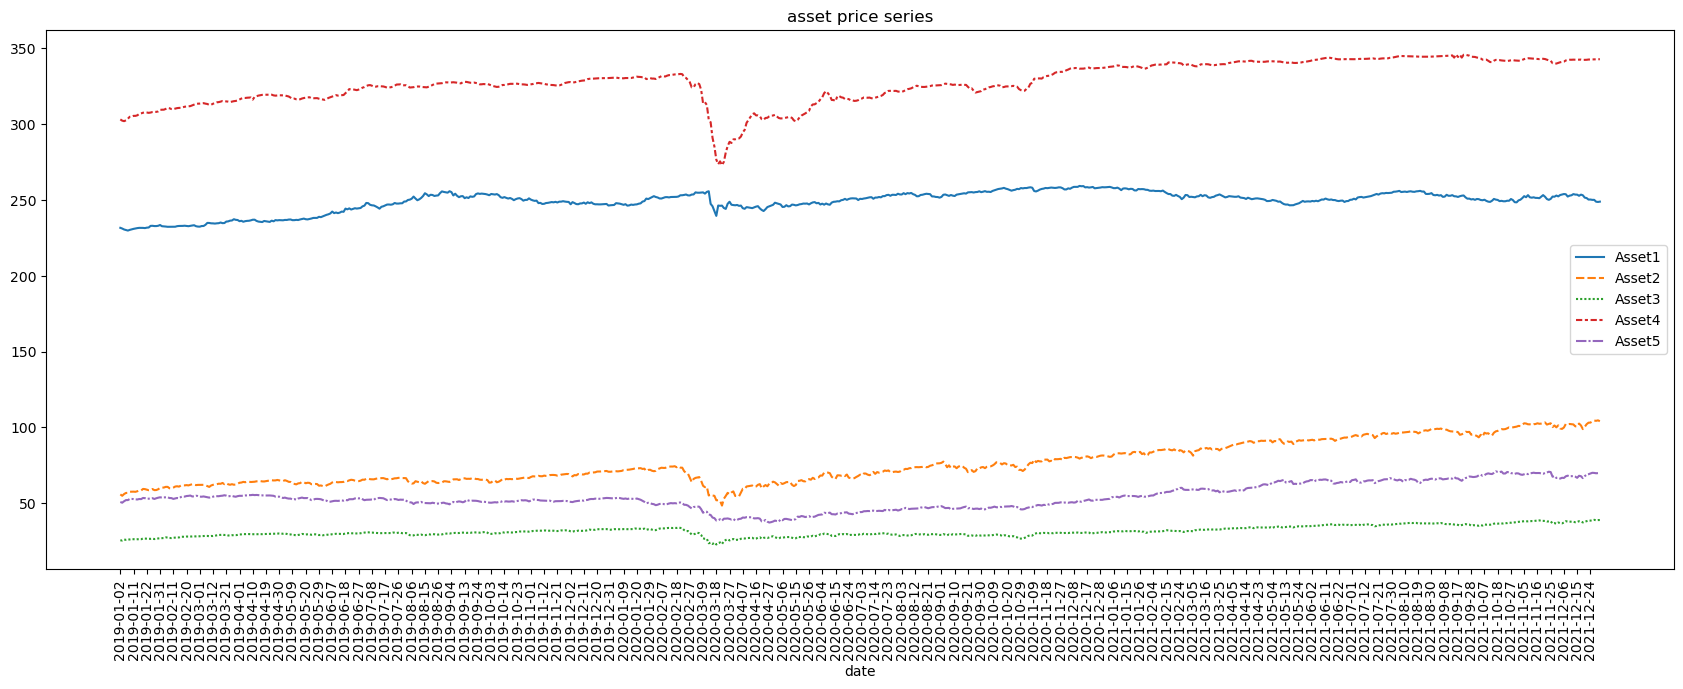

In [5]:
plt.figure(figsize=(21, 7))
plt.title("asset price series")
plt.xlabel('date')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df.index), 7))

sns.lineplot(data=df)

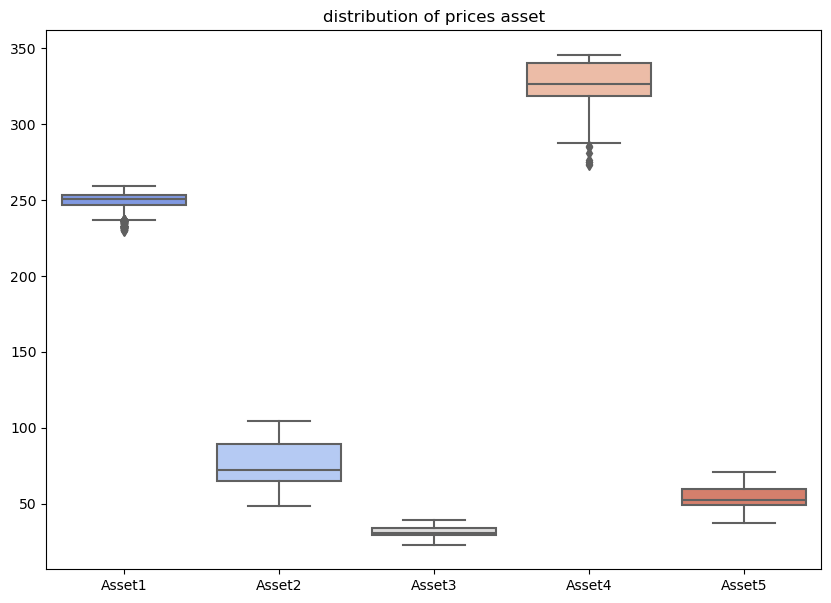

In [6]:
plt.figure(figsize=(10, 7))
sns.boxplot(df_price, palette="coolwarm")
plt.title("distribution of prices asset")
plt.show()

In [7]:
df.columns

Index(['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'], dtype='object')

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [9]:
# creating a dataframe witch calculate the daily percentage returns for each financial asset 

daily = {'Asset1':[],
         'Asset2':[],
         'Asset3':[],
         'Asset4':[],
         'Asset5':[]
        }


for asset in daily.keys():
    for i in range(len(df.index)):
        if i==0:
            daily[asset].append(0) # First day has no previous day, so set daily difference to 0 or NaN
        else:
            daily[asset].append(df.iloc[i][asset] - df.iloc[i-1][asset]) # Calculate the difference between the current and previous day for each asset
    
df_daily=pd.DataFrame(daily,index=df.index)

In [10]:
df_daily.head(3)

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.0000,0.000,0.000000,0.00,0.00
2019-01-03,-0.4705,-0.898,-0.146175,-0.82,-0.48
2019-01-04,-0.6330,1.152,0.644086,-0.34,0.97


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [15]:
correlation_matrix = df_daily.corr()
correlation_matrix

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,-0.094044,-0.075454,0.109081,-0.131393
Asset2,-0.094044,1.000000,0.844810,0.497951,0.558836
Asset3,-0.075454,0.844810,1.000000,0.516149,0.522886
Asset4,0.109081,0.497951,0.516149,1.000000,0.385608
Asset5,-0.131393,0.558836,0.522886,0.385608,1.000000


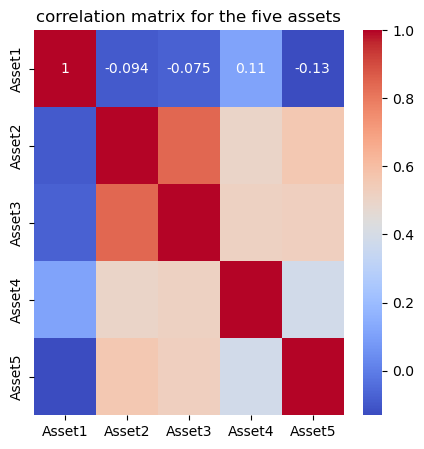

In [16]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(5, 5))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("correlation matrix for the five assets")
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

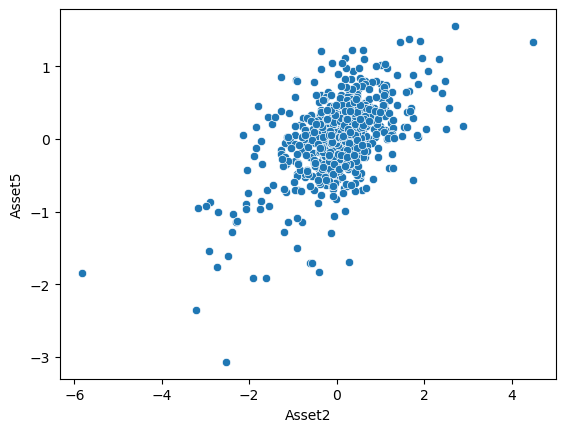

In [23]:
# Create a scatter plot comparing the returns of two specific assets

sns.scatterplot(data=df_daily, x='Asset2', y='Asset5', )
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [47]:
# loading file 
df_weights=pd.read_csv('portfolio_weights.csv')
df_weights.set_index('date',inplace=True)
df_weights.head(2)

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974


In [43]:
# Extract columns for stackplot:
Asset1 = df_weights['Asset1']
Asset2 = df_weights['Asset2']
Asset3 = df_weights['Asset3']
Asset4 = df_weights['Asset4']
Asset5 = df_weights['Asset5']


Text(0, 0.5, 'Weights')

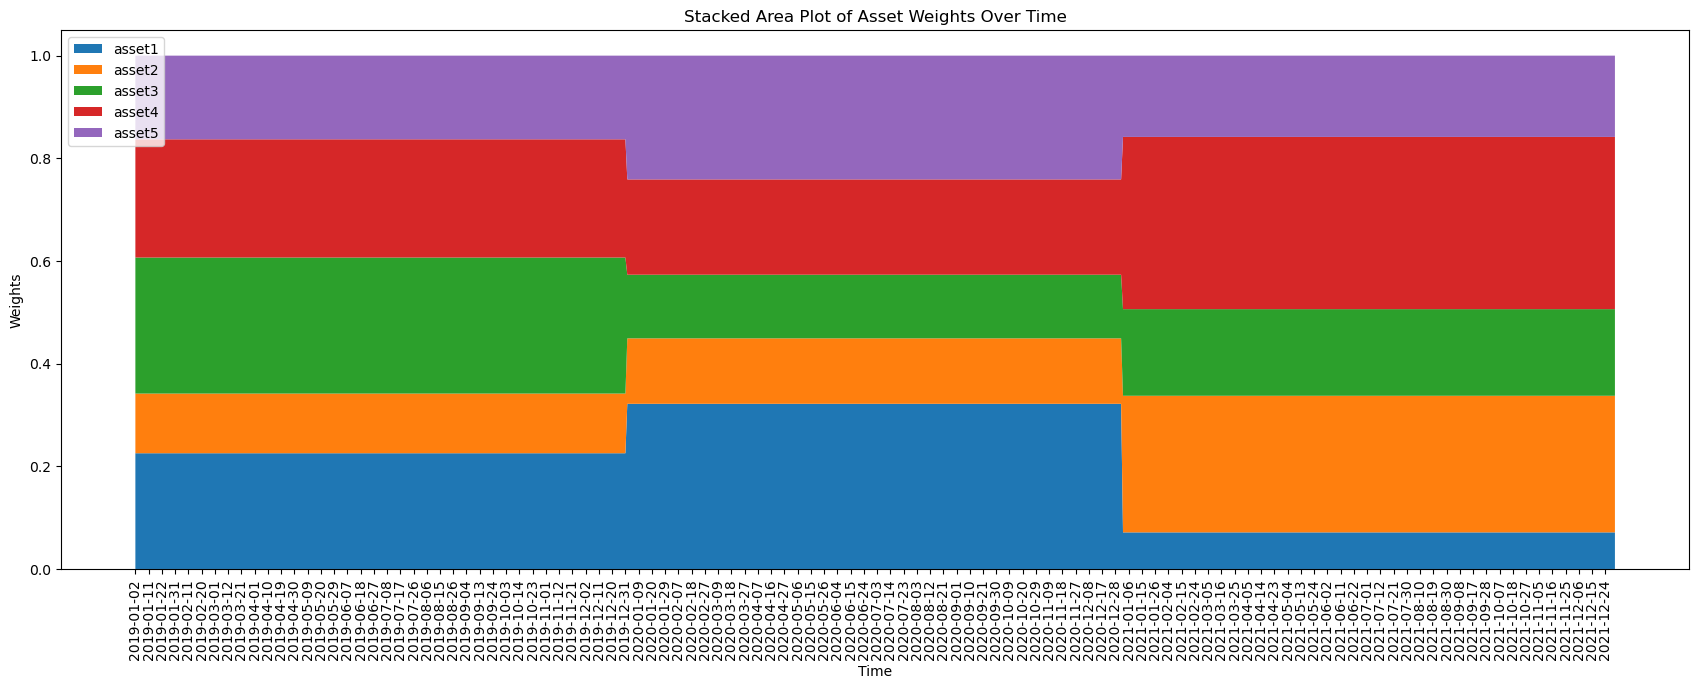

In [49]:
# Create the stack plot
plt.figure(figsize=(21, 7))
plt.stackplot(df_weights.index, Asset1, Asset2, Asset3, Asset4, Asset5, labels=['asset1', 'asset2', 'asset3', 'asset4', 'asset5'])
plt.legend(loc='upper left')
plt.title("Stacked Area Plot of Asset Weights Over Time")
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df.index), 7))
plt.xlabel("Time")
plt.ylabel("Weights")

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [50]:
df_weights.head(2)

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974


In [62]:
df_weights.iloc[[0]]

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974


In [68]:
df_weights.iloc[0]['Asset1']+df_weights.iloc[0]['Asset2']+df_weights.iloc[0]['Asset3']+df_weights.iloc[0]['Asset4']+df_weights.iloc[0]['Asset5']

0.9999999999999999

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>